In [1]:
import pandas as pd

In [3]:
import time
from tqdm import tqdm

def scrape_race_results(race_id_list,pre_race_results={}):
    race_results=pre_race_results
    for race_id in tqdm(race_id_list):
        if race_id in race_results.keys():
            continue
        try:
            url="https://db.netkeiba.com/race/shutuba.html?race_id=" + race_id
            race_results[race_id]=pd.read_html(url)[0]
            time.sleep(1)
        except IndexError:
            continue
        except:
            break
    return race_results

In [7]:
url="https://db.netkeiba.com/race/202005030304"
pd.read_html(url)

IndexError: list index out of range

In [13]:
race_id_list=[]
for place in range(1,11,1):
    for kai in range(1,6,1):
        for day in range(1,9,1):
            for r in range(1,3,1):
                race_id = "2019"+str(place).zfill(2)+str(kai).zfill(2)+str(day).zfill(2)+str(r).zfill(2)
                race_id_list.append(race_id)

In [14]:
test={}
test = scrape_race_results(race_id_list,test)

  0%|                     | 0/800 [00:00<?, ?it/s]


In [7]:
race_id_list

['201901010101',
 '201901010102',
 '201901010201',
 '201901010202',
 '201901010301',
 '201901010302',
 '201901010401',
 '201901010402',
 '201901010501',
 '201901010502',
 '201901010601',
 '201901010602',
 '201901010701',
 '201901010702',
 '201901010801',
 '201901010802',
 '201901020101',
 '201901020102',
 '201901020201',
 '201901020202',
 '201901020301',
 '201901020302',
 '201901020401',
 '201901020402',
 '201901020501',
 '201901020502',
 '201901020601',
 '201901020602',
 '201901020701',
 '201901020702',
 '201901020801',
 '201901020802',
 '201901030101',
 '201901030102',
 '201901030201',
 '201901030202',
 '201901030301',
 '201901030302',
 '201901030401',
 '201901030402',
 '201901030501',
 '201901030502',
 '201901030601',
 '201901030602',
 '201901030701',
 '201901030702',
 '201901030801',
 '201901030802',
 '201901040101',
 '201901040102',
 '201901040201',
 '201901040202',
 '201901040301',
 '201901040302',
 '201901040401',
 '201901040402',
 '201901040501',
 '201901040502',
 '201901040601

In [58]:
for key in test.keys():
    test[key].index = [key] * len(test[key])

In [59]:
results = pd.concat([test[key] for key in test.keys()],sort=False)

In [60]:
results.to_pickle("results2003.pickle")

In [61]:
# 2 データ整形

In [42]:
results=pd.read_pickle("results.pickle")

In [5]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7454 entries, 201901010101 to 201910020802
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   着順      7454 non-null   object 
 1   枠番      7454 non-null   int64  
 2   馬番      7454 non-null   int64  
 3   馬名      7454 non-null   object 
 4   性齢      7454 non-null   object 
 5   斤量      7454 non-null   int64  
 6   騎手      7454 non-null   object 
 7   タイム     7386 non-null   object 
 8   着差      6853 non-null   object 
 9   単勝      7454 non-null   object 
 10  人気      7420 non-null   float64
 11  馬体重     7454 non-null   object 
 12  調教師     7454 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 815.3+ KB


In [6]:
results2=results[~results["着順"].astype(str).str.contains("\D")]

In [7]:
results2.columns

Index(['着順', '枠番', '馬番', '馬名', '性齢', '斤量', '騎手', 'タイム', '着差', '単勝', '人気',
       '馬体重', '調教師'],
      dtype='object')

In [8]:
results['性齢']

201901010101    牡2
201901010101    牡2
201901010101    牡2
201901010101    牡2
201901010101    牡2
                ..
201910020802    牡2
201910020802    牡2
201910020802    牡2
201910020802    牡2
201910020802    牝2
Name: 性齢, Length: 7454, dtype: object

In [9]:
results2["性"]=results2['性齢'].map(lambda x: str(x)[0])

C:\Users\kenzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
results2["年齢"]=results2['性齢'].map(lambda x: str(x)[1:])

C:\Users\kenzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
results2["体重"]=results2["馬体重"].str.split("(",expand=True)[0].astype(int)

C:\Users\kenzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
results2["体重変化"]=results2["馬体重"].str.split("(",expand=True)[1].str[:-1].astype(int)

C:\Users\kenzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
results2

,着順,枠番,馬番,馬名,性齢,斤量,騎手,タイム,着差,単勝,人気,馬体重,調教師,性,年齢,体重,体重変化
201901010101,1,1,1,ゴルコンダ,牡2,54,ルメール,1:48.3,NaN,1.4,1.0,518(-16),[東] 木村哲也,牡,2,518,-16
201901010101,2,3,3,プントファイヤー,牡2,54,岩田康誠,1:50.1,大,3.5,2.0,496(-8),[東] 手塚貴久,牡,2,496,-8
201901010101,3,4,4,ラグリマスネグラス,牡2,51,団野大成,1:50.9,5,46.6,6.0,546(+6),[東] 藤沢和雄,牡,2,546,6
201901010101,4,8,9,キタノコドウ,牡2,51,菅原明良,1:51.5,3.1/2,56.8,7.0,458(-8),[東] 高木登,牡,2,458,-8
201901010101,5,5,5,ネモフィラブルー,牡2,54,川島信二,1:51.7,1.1/2,140.3,9.0,436(0),[西] 矢作芳人,牡,2,436,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201910020802,6,4,4,メイショウカムロ,牡2,51,斎藤新,1:10.7,ハナ,9.8,4.0,446(+8),[西] 荒川義之,牡,2,446,8
201910020802,7,6,6,アイファーブルー,牡2,54,藤井勘一,1:11.2,3,30.2,6.0,456(+6),[西] 西橋豊治,牡,2,456,6
201910020802,8,5,5,ヒデノヴェローチェ,牡2,51,亀田温心,1:11.4,1.1/4,63,7.0,446(-2),[西] 北出成人,牡,2,446,-2
201910020802,9,2,2,ムート,牡2,54,松山弘平,1:12.0,4,76,9.0,444(+10),[西] 川村禎彦,牡,2,444,10


In [14]:
results2.drop(["タイム","着差","調教師"],axis=1,inplace=True)

C:\Users\kenzo\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
results2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7384 entries, 201901010101 to 201910020802
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   着順      7384 non-null   object 
 1   枠番      7384 non-null   int64  
 2   馬番      7384 non-null   int64  
 3   馬名      7384 non-null   object 
 4   性齢      7384 non-null   object 
 5   斤量      7384 non-null   int64  
 6   騎手      7384 non-null   object 
 7   単勝      7384 non-null   object 
 8   人気      7384 non-null   float64
 9   馬体重     7384 non-null   object 
 10  性       7384 non-null   object 
 11  年齢      7384 non-null   object 
 12  体重      7384 non-null   int32  
 13  体重変化    7384 non-null   int32  
dtypes: float64(1), int32(2), int64(3), object(8)
memory usage: 807.6+ KB


In [16]:
results2["着順"]=results2["着順"].astype(int)

C:\Users\kenzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
results2["単勝"]=results2["単勝"].astype(float)

C:\Users\kenzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
results2.drop(["性齢","馬体重"],axis=1,inplace=True)

In [19]:
results2["年齢"]=results2["年齢"].astype(int)

C:\Users\kenzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
results2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7384 entries, 201901010101 to 201910020802
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   着順      7384 non-null   int32  
 1   枠番      7384 non-null   int64  
 2   馬番      7384 non-null   int64  
 3   馬名      7384 non-null   object 
 4   斤量      7384 non-null   int64  
 5   騎手      7384 non-null   object 
 6   単勝      7384 non-null   float64
 7   人気      7384 non-null   float64
 8   性       7384 non-null   object 
 9   年齢      7384 non-null   int32  
 10  体重      7384 non-null   int32  
 11  体重変化    7384 non-null   int32  
dtypes: float64(2), int32(4), int64(3), object(3)
memory usage: 634.6+ KB


In [39]:
def preprocessing(results):
    df = results.copy()
    df=df[~results["着順"].astype(str).str.contains("\D")]
    df["着順"]=df["着順"].astype(int)
    df["性"]=df['性齢'].map(lambda x: str(x)[0])
    df["年齢"]=df['性齢'].map(lambda x: str(x)[1:])
    df["体重"]=df["馬体重"].str.split("(",expand=True)[0].astype(int)
    df["体重変化"]=df["馬体重"].str.split("(",expand=True)[1].str[:-1].astype(int)
    df["単勝"]=df["単勝"].astype(float)
    df["年齢"]=df["年齢"].astype(int)
    df.drop(["タイム","着差","調教師"],axis=1,inplace=True)
    df.drop(["性齢","馬体重"],axis=1,inplace=True)
    df["date"]=pd.to_datetime(df["date"],format="%Y年%m月%d日")
    return df

In [22]:
results = preprocessing(results)

In [23]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7384 entries, 201901010101 to 201910020802
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   着順      7384 non-null   int32  
 1   枠番      7384 non-null   int64  
 2   馬番      7384 non-null   int64  
 3   馬名      7384 non-null   object 
 4   斤量      7384 non-null   int64  
 5   騎手      7384 non-null   object 
 6   単勝      7384 non-null   float64
 7   人気      7384 non-null   float64
 8   性       7384 non-null   object 
 9   年齢      7384 non-null   int32  
 10  体重      7384 non-null   int32  
 11  体重変化    7384 non-null   int32  
dtypes: float64(2), int32(4), int64(3), object(3)
memory usage: 634.6+ KB


In [24]:
# 3ロジスティック回帰

In [25]:
clip_rank = lambda x: x if x < 4 else 4

results["rank"] = results["着順"].map(clip_rank)

In [26]:
results

,着順,枠番,馬番,馬名,斤量,騎手,単勝,人気,性,年齢,体重,体重変化,rank
201901010101,1,1,1,ゴルコンダ,54,ルメール,1.4,1.0,牡,2,518,-16,1
201901010101,2,3,3,プントファイヤー,54,岩田康誠,3.5,2.0,牡,2,496,-8,2
201901010101,3,4,4,ラグリマスネグラス,51,団野大成,46.6,6.0,牡,2,546,6,3
201901010101,4,8,9,キタノコドウ,51,菅原明良,56.8,7.0,牡,2,458,-8,4
201901010101,5,5,5,ネモフィラブルー,54,川島信二,140.3,9.0,牡,2,436,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201910020802,6,4,4,メイショウカムロ,51,斎藤新,9.8,4.0,牡,2,446,8,4
201910020802,7,6,6,アイファーブルー,54,藤井勘一,30.2,6.0,牡,2,456,6,4
201910020802,8,5,5,ヒデノヴェローチェ,51,亀田温心,63.0,7.0,牡,2,446,-2,4
201910020802,9,2,2,ムート,54,松山弘平,76.0,9.0,牡,2,444,10,4


In [27]:
results.drop(["着順","馬名"],axis=1,inplace=True)

In [28]:
results_d=pd.get_dummies(results)

In [30]:
results_d.to_pickle("results_d.pickle")

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd

In [105]:
results_d=pd.read_pickle("results_d.pickle")
results_d

,枠番,馬番,斤量,単勝,人気,年齢,体重,体重変化,rank,騎手_アヴドゥ,...,騎手_高田潤,騎手_高野和馬,騎手_鮫島克駿,騎手_鮫島良太,騎手_黒岩悠,騎手_黛弘人,騎手_Ｍ．デム,性_セ,性_牝,性_牡
201901010101,1,1,54,1.4,1.0,2,518,-16,1,0,...,0,0,0,0,0,0,0,0,0,1
201901010101,3,3,54,3.5,2.0,2,496,-8,2,0,...,0,0,0,0,0,0,0,0,0,1
201901010101,4,4,51,46.6,6.0,2,546,6,3,0,...,0,0,0,0,0,0,0,0,0,1
201901010101,8,9,51,56.8,7.0,2,458,-8,4,0,...,0,0,0,0,0,0,0,0,0,1
201901010101,5,5,54,140.3,9.0,2,436,0,4,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201910020802,4,4,51,9.8,4.0,2,446,8,4,0,...,0,0,0,0,0,0,0,0,0,1
201910020802,6,6,54,30.2,6.0,2,456,6,4,0,...,0,0,0,0,0,0,0,0,0,1
201910020802,5,5,51,63.0,7.0,2,446,-2,4,0,...,0,0,0,0,0,0,0,0,0,1
201910020802,2,2,54,76.0,9.0,2,444,10,4,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
X=results_d.drop(["rank"],axis=1)
y=results_d["rank"]

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=0)

In [7]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\kenzo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_pred=model.predict(X_test)

In [9]:
pd.Series(y_pred).value_counts()

4    2215
1       1
dtype: int64

In [10]:
print(model.score(X_train,y_train),model.score(X_test,y_test))

0.7846362229102167 0.7838447653429603


In [10]:
from imblearn.under_sampling import RandomUnderSampler

rank_1 = y_train.value_counts()[1]
rank_2 = y_train.value_counts()[2]
rank_3 = y_train.value_counts()[3]
rus=RandomUnderSampler(random_state=71,sampling_strategy={1:rank_1,2:rank_2,3:rank_3,4:rank_1})
X_train_rus,y_train_rus=rus.fit_sample(X_train,y_train)

Using TensorFlow backend.


In [11]:
pd.Series(y_train_rus).value_counts()

4    374
1    374
3    371
2    371
Name: rank, dtype: int64

In [12]:
model=LogisticRegression()
model.fit(X_train_rus,y_train_rus)
print(model.score(X_train,y_train),model.score(X_test,y_test))

0.5861068111455109 0.5685920577617328


C:\Users\kenzo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
y_pred=model.predict(X_test)

In [12]:
pred_df=pd.DataFrame({"pred":y_pred,"actual":y_test})

In [13]:
pred_df[pred_df["pred"]==4]["actual"].value_counts()

4    1737
1     160
3     159
2     159
Name: actual, dtype: int64

In [14]:
coefs=pd.Series(model.coef_[0],index=X.columns).sort_values()

In [15]:
coefs

人気        -0.060368
単勝        -0.023361
馬番        -0.010996
枠番        -0.004882
性_牝       -0.004335
             ...   
騎手_三浦皇成    0.003739
性_牡        0.005029
騎手_ルメール    0.005602
斤量         0.016617
体重変化       0.021869
Length: 177, dtype: float64

In [16]:
results_d[results_d["騎手_ルメール"]==1]["rank"].value_counts()

1    28
4    24
2    16
3    12
Name: rank, dtype: int64

In [17]:
# 4 ランダムフォレスト

In [18]:
import re
re.findall(r"\w+",text)

NameError: name 'text' is not defined

In [41]:
text2=soup.find("div",attrs={"class":"data_intro"}).find_all("p")[1].text

In [42]:
re.findall(r"\w+",text2)

['2019年7月27日', '1回札幌1日目', '2歳未勝利', '混', '指', '馬齢']

In [19]:
race_id_list=results_d.index.unique()

In [3]:
import time
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook as tqdm
def scrape_race_info(race_id_list):
    race_infos={}
    try:
        for race_id in tqdm(race_id_list):
            url="https://db.netkeiba.com/race/" + race_id
            html=requests.get(url)
            html.encoding="EUC-JP"
            soup=BeautifulSoup(html.text,"html.parser")
            texts=soup.find("div",attrs={"class":"data_intro"}).find_all("p")[0].text +\
                soup.find("div",attrs={"class":"data_intro"}).find_all("p")[1].text
            info=re.findall(r"\w+",texts)
            info_dict={}
            for text in info:
                if text in ["芝","ダート"]:
                    info_dict["race_type"]=text
                if "障" in text:
                    info_dict["race_type"]="障害"
                if "m" in text:
                    info_dict["course_len"]=re.findall(r"\d+",text)[0]
                if text in ["良","稍重","重","不良"]:
                    info_dict["ground_state"]=text
                if text in ["曇","晴","雨","小雨","小雪","雪"]:
                    info_dict["weather"]=text
                if "年" in text:
                    info_dict["date"]=text
            race_infos[race_id]=info_dict
            time.sleep(1)
        except IndexError:
            continue
        except:
            break
        return race_infos

SyntaxError: invalid syntax (<ipython-input-3-c22934b885c1>, line 32)

In [97]:
race_df=pd.DataFrame(race_infos).T
race_df.to_pickle("race_df.pickle")

In [28]:
results_d

,枠番,馬番,斤量,単勝,人気,年齢,体重,体重変化,rank,騎手_アヴドゥ,...,騎手_高田潤,騎手_高野和馬,騎手_鮫島克駿,騎手_鮫島良太,騎手_黒岩悠,騎手_黛弘人,騎手_Ｍ．デム,性_セ,性_牝,性_牡
201901010101,1,1,54,1.4,1.0,2,518,-16,1,0,...,0,0,0,0,0,0,0,0,0,1
201901010101,3,3,54,3.5,2.0,2,496,-8,2,0,...,0,0,0,0,0,0,0,0,0,1
201901010101,4,4,51,46.6,6.0,2,546,6,3,0,...,0,0,0,0,0,0,0,0,0,1
201901010101,8,9,51,56.8,7.0,2,458,-8,4,0,...,0,0,0,0,0,0,0,0,0,1
201901010101,5,5,54,140.3,9.0,2,436,0,4,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201910020802,4,4,51,9.8,4.0,2,446,8,4,0,...,0,0,0,0,0,0,0,0,0,1
201910020802,6,6,54,30.2,6.0,2,456,6,4,0,...,0,0,0,0,0,0,0,0,0,1
201910020802,5,5,51,63.0,7.0,2,446,-2,4,0,...,0,0,0,0,0,0,0,0,0,1
201910020802,2,2,54,76.0,9.0,2,444,10,4,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
results_addinfo=results.merge(race_df,left_index=True,right_index=True,how="inner")
results_addinfo

,着順,枠番,馬番,馬名,性齢,斤量,騎手,タイム,着差,単勝,人気,馬体重,調教師,course_len,weather,race_type,ground_state,date
201901010101,1,1,1,ゴルコンダ,牡2,54,ルメール,1:48.3,NaN,1.4,1.0,518(-16),[東] 木村哲也,1800,曇,芝,良,2019年7月27日
201901010101,2,3,3,プントファイヤー,牡2,54,岩田康誠,1:50.1,大,3.5,2.0,496(-8),[東] 手塚貴久,1800,曇,芝,良,2019年7月27日
201901010101,3,4,4,ラグリマスネグラス,牡2,51,団野大成,1:50.9,5,46.6,6.0,546(+6),[東] 藤沢和雄,1800,曇,芝,良,2019年7月27日
201901010101,4,8,9,キタノコドウ,牡2,51,菅原明良,1:51.5,3.1/2,56.8,7.0,458(-8),[東] 高木登,1800,曇,芝,良,2019年7月27日
201901010101,5,5,5,ネモフィラブルー,牡2,54,川島信二,1:51.7,1.1/2,140.3,9.0,436(0),[西] 矢作芳人,1800,曇,芝,良,2019年7月27日
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201910020802,6,4,4,メイショウカムロ,牡2,51,斎藤新,1:10.7,ハナ,9.8,4.0,446(+8),[西] 荒川義之,1200,曇,芝,良,2019年8月18日
201910020802,7,6,6,アイファーブルー,牡2,54,藤井勘一,1:11.2,3,30.2,6.0,456(+6),[西] 西橋豊治,1200,曇,芝,良,2019年8月18日
201910020802,8,5,5,ヒデノヴェローチェ,牡2,51,亀田温心,1:11.4,1.1/4,63,7.0,446(-2),[西] 北出成人,1200,曇,芝,良,2019年8月18日
201910020802,9,2,2,ムート,牡2,54,松山弘平,1:12.0,4,76,9.0,444(+10),[西] 川村禎彦,1200,曇,芝,良,2019年8月18日


In [67]:
test = preprocessing(results_addinfo)

In [68]:
test.sort_values("date")

,着順,枠番,馬番,馬名,斤量,騎手,単勝,人気,course_len,weather,race_type,ground_state,date,性,年齢,体重,体重変化
201906010102,6,7,13,ジュエルインザサン,54,ブロンデ,25.6,7.0,1800,晴,ダート,良,2019-01-05,牝,3,472,8
201908010101,3,5,10,ロズ,54,国分恭介,88.7,12.0,1800,曇,ダート,良,2019-01-05,牝,3,438,4
201908010101,4,2,3,クリノクルミチャン,51,服部寿希,140.5,14.0,1800,曇,ダート,良,2019-01-05,牝,3,482,4
201908010101,5,3,5,エイシンロード,53,坂井瑠星,9.1,7.0,1800,曇,ダート,良,2019-01-05,牝,3,488,4
201908010101,6,7,13,ペプチドフシチョウ,52,富田暁,44.6,10.0,1800,曇,ダート,良,2019-01-05,牝,3,442,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201909050802,11,1,1,ダコタブラックヒル,55,古川吉洋,15.8,7.0,1800,曇,ダート,良,2019-12-22,牡,2,478,-2
201909050802,12,8,15,ドリームハット,54,加藤祥太,329.3,15.0,1800,曇,ダート,良,2019-12-22,牝,2,440,6
201909050802,13,7,13,ダイヴィンダート,55,松若風馬,13.1,6.0,1800,曇,ダート,良,2019-12-22,牡,2,510,-6
201906050801,15,6,11,クイーンキャンディ,54,嘉藤貴行,388.0,13.0,1200,曇,ダート,良,2019-12-22,牝,2,446,-2


In [69]:
sorted_id_list=test.sort_values("date").index.unique()

In [70]:
round(len(sorted_id_list)*0.7)

372

In [71]:
train_id_list=sorted_id_list[:round(len(sorted_id_list)*0.7)]
train_id_list

Index(['201906010102', '201908010101', '201908010102', '201906010101',
       '201908010202', '201908010201', '201906010202', '201906010201',
       '201906010301', '201906010302',
       ...
       '201901020402', '201901020401', '201901020501', '201901020502',
       '201901020602', '201901020601', '201906040101', '201909040102',
       '201906040102', '201909040101'],
      dtype='object', length=372)

In [72]:
test_id_list=sorted_id_list[round(len(sorted_id_list)*0.7):]
test_id_list

Index(['201909040201', '201906040201', '201906040202', '201909040202',
       '201909040302', '201909040301', '201906040302', '201906040301',
       '201906040401', '201906040402',
       ...
       '201906050601', '201909050601', '201909050702', '201909050701',
       '201906050701', '201906050702', '201906050802', '201909050801',
       '201906050801', '201909050802'],
      dtype='object', length=160)

In [73]:
results_p=test

In [74]:
train=results_p.loc[train_id_list]
test=results_p.loc[test_id_list]

In [55]:
len(train)

7384

In [56]:
len(test)

2191

In [76]:
def split_data(df,test_size):
    sorted_id_list=df.sort_values("date").index.unique()
    train_id_list=sorted_id_list[:round(len(sorted_id_list)*(1-test_size))]
    test_id_list=sorted_id_list[round(len(sorted_id_list)*(1-test_size)):]
    train=df.loc[train_id_list]
    test=df.loc[test_id_list]
    return train,test

In [77]:
train,test=split_data(results_p,0.3)

In [78]:
len(train)

5193

In [104]:
results_p.drop(["馬名"],axis=1,inplace=True)

KeyError: "['馬名'] not found in axis"

In [82]:
results_d=pd.get_dummies(results_p)

In [83]:
results_d["rank"]=results_d["着順"].map(lambda x:x if x<4 else 4)

In [84]:
train,test=split_data(results_d,0.3)

In [86]:
from imblearn.under_sampling import RandomUnderSampler

rank_1 = y_train.value_counts()[1]
rank_2 = y_train.value_counts()[2]
rank_3 = y_train.value_counts()[3]
rus=RandomUnderSampler(random_state=71,sampling_strategy={1:rank_1,2:rank_2,3:rank_3,4:rank_1})
X_train=train.drop(["着順","date","rank"],axis=1)
y_train=train["rank"]
X_test=test.drop(["着順","date","rank"],axis=1)
y_test=test["rank"]
X_train_rus,y_train_rus=rus.fit_sample(X_train,y_train)

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
clf=RandomForestClassifier(random_state=0)

In [89]:
clf.fit(X_train_rus,y_train_rus)
print(clf.score(X_train,y_train),clf.score(X_test,y_test))

0.7440785673021375 0.5659516202647193


# 関数一覧

In [2]:
import time
import requests
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook as tqdm
def scrape_race_info(race_id_list):
    race_infos={}
    for race_id in tqdm(race_id_list):
        try:
            url="https://db.netkeiba.com/race/" + race_id
            html=requests.get(url)
            html.encoding="EUC-JP"
            soup=BeautifulSoup(html.text,"html.parser")
            texts=soup.find("div",attrs={"class":"data_intro"}).find_all("p")[0].text +\
                soup.find("div",attrs={"class":"data_intro"}).find_all("p")[1].text
            info=re.findall(r"\w+",texts)
            info_dict={}
            for text in info:
                if text in ["芝","ダート"]:
                    info_dict["race_type"]=text
                if "障" in text:
                    info_dict["race_type"]="障害"
                if "m" in text:
                    info_dict["course_len"]=re.findall(r"\d+",text)[0]
                if text in ["良","稍重","重","不良"]:
                    info_dict["ground_state"]=text
                if text in ["曇","晴","雨","小雨","小雪","雪"]:
                    info_dict["weather"]=text
                if "年" in text:
                    info_dict["date"]=text
            race_infos[race_id]=info_dict
            time.sleep(1)
        except IndexError:
            continue
        except Exception as e:
            print(e)
            break
    return race_infos

def preprocessing(results):
    df = results.copy()
    df=df[~results["着順"].astype(str).str.contains("\D")]
    df["着順"]=df["着順"].astype(int)
    df["性"]=df['性齢'].map(lambda x: str(x)[0])
    df["年齢"]=df['性齢'].map(lambda x: str(x)[1:])
    df["体重"]=df["馬体重"].str.split("(",expand=True)[0].astype(int)
    df["体重変化"]=df["馬体重"].str.split("(",expand=True)[1].str[:-1].astype(int)
    df["単勝"]=df["単勝"].astype(float)
    df["年齢"]=df["年齢"].astype(int)
    df.drop(["タイム","着差","調教師"],axis=1,inplace=True)
    df.drop(["性齢","馬体重"],axis=1,inplace=True)
    df["date"]=pd.to_datetime(df["date"],format="%Y年%m月%d日")
    return df

def split_data(df,test_size=0.3):
    sorted_id_list=df.sort_values("date").index.unique()
    train_id_list=sorted_id_list[:round(len(sorted_id_list)*(1-test_size))]
    test_id_list=sorted_id_list[round(len(sorted_id_list)*(1-test_size)):]
    train=df.loc[train_id_list]
    test=df.loc[test_id_list]
    return train,test

def init_data():
    results=pd.read_pickle("results.pickle")
    race = pd.read_pickle("race_df.pickle")
    results_addinfo=results.merge(race,left_index=True,right_index=True,how="inner")
    results_addinfo=preprocessing(results_addinfo)
    return results_addinfo

ModuleNotFoundError: No module named 'bs4'

In [2]:
results_d = init_data()

In [3]:
results_d["rank"]=results_d["着順"].map(lambda x:x if x<4 else 4)
results_d["rank"]=results_d["rank"].map(lambda x:1 if x<4 else 0)

In [4]:
results_d.drop(["馬名"],axis=1,inplace=True)

In [5]:
results_d
results_d=pd.get_dummies(results_d)

In [6]:
train,test=split_data(results_d)

In [7]:
X_train=train.drop(["date","rank"],axis=1)
y_train=train["rank"]
X_test=test.drop(["date","rank"],axis=1)
y_test=test["rank"]

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rf = RandomForestClassifier(random_state=100)

In [10]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [11]:
y_pred=rf.predict_proba(X_test)[:,1]

In [12]:
y_pred


array([0.8 , 0.87, 0.95, ..., 0.07, 0.  , 0.02])

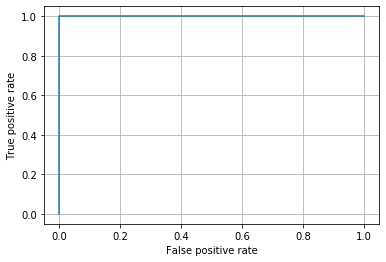

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.71, 0.7 , 0.68, 0.67, 0.28,
       0.26, 0.25, 0.24, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15,
       0.14, 0.13, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04,
       0.03, 0.02, 0.01, 0.  ])

In [13]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.grid()
plt.show()
thresholds

In [14]:
roc_auc_score(y_test,y_pred)

1.0

In [16]:
import lightgbm as lgb

In [19]:
params={
    "num_leaves":4,
    "n_estimators":70,
    "random_state":100
}
lgb_clf=lgb.LGBMClassifier(**params)
lgb_clf.fit(X_train.values,y_train.values)
y_pred_train=lgb_clf.predict_proba(X_train)[:,1]
y_pred=lgb_clf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_train,y_pred_train))

1.0


In [21]:
importances=pd.DataFrame({"features":X_train.columns,"importance":rf.feature_importances_})
importances.sort_values("importance",ascending=False)[:20]

,features,importance
0,着順,0.647246
5,人気,0.090420
4,単勝,0.081002
7,体重,0.018979
8,体重変化,0.013981
2,馬番,0.013148
1,枠番,0.010001
3,斤量,0.005927
19,騎手_ルメール,0.004164
6,年齢,0.003823


In [ ]:
import time
from tdqm import tdqm_notebook as tdqm

def scrape_race_results(race_id_list,pre_race_results{}):
    race_results=pre_race_results
    for race_id in tdqm(race_id_list):
        if race_id in race_results.keys():
            continue
        try:
            url="https://db.netkeiba.com/race/"+race_id
            df=pd.read_html(url)[0]
            